In [1]:
%pip install barbar

In [1]:
import numpy as np
import torch

import matplotlib.pyplot as plt
import pandas as pd 

from train import TrainerDAGMM
from test import eval
from preprocess import get_KDDCup99

In [2]:
class Args:
    num_epochs     = 200
    patience       = 50
    lr             = 1e-4
    lr_milestones  = [50]
    batch_size     = 1024
    latent_dim     = 1
    n_gmm          = 4
    lambda_energy  = 0.1
    lambda_cov     = 0.005
    lambda_kl      = 1 

    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = get_KDDCup99(args)

dagmm = TrainerDAGMM(args, data, device)
dagmm.train()

c:\Users\RAM CHANDAN SINGH\OneDrive - iitgn.ac.in\Desktop\PyTorch-DAGMM\forward_step.py:92: UserWarning: torch.cholesky is deprecated in favor of torch.linalg.cholesky and will be removed in a future PyTorch release.
L = torch.cholesky(A)
should be replaced with
L = torch.linalg.cholesky(A)
and
U = torch.cholesky(A, upper=True)
should be replaced with
U = torch.linalg.cholesky(A).mH
This transform will produce equivalent results for all valid (symmetric positive definite) inputs. (Triggered internally at ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:1703.)
  l = torch.cholesky(a, False)


Training DAGMM+VAE... Epoch: 0, Loss: 317.7480
Testing...
Precision : 0.3849, Recall : 0.2412, F-score : 0.2966
ROC AUC score: 57.54
Training DAGMM+VAE... Epoch: 10, Loss: 0.2786
Testing...
Precision : 0.9642, Recall : 0.9465, F-score : 0.9553
ROC AUC score: 98.47
Training DAGMM+VAE... Epoch: 20, Loss: 0.2680
Testing...
Precision : 0.9642, Recall : 0.9464, F-score : 0.9553
ROC AUC score: 98.38
Training DAGMM+VAE... Epoch: 30, Loss: 0.2628
Testing...
Precision : 0.9644, Recall : 0.9466, F-score : 0.9554
ROC AUC score: 98.42
Training DAGMM+VAE... Epoch: 40, Loss: 0.2591
Testing...
Precision : 0.9643, Recall : 0.9465, F-score : 0.9553
ROC AUC score: 98.39
Training DAGMM+VAE... Epoch: 50, Loss: 0.2568
Testing...
Precision : 0.9642, Recall : 0.9465, F-score : 0.9553
ROC AUC score: 98.39
Training DAGMM+VAE... Epoch: 60, Loss: 0.2546
Testing...
Precision : 0.9642, Recall : 0.9464, F-score : 0.9552
ROC AUC score: 98.39


KeyboardInterrupt: 

In [3]:
from test import eval
sub = [10,20,30, 40, 50, 60]
for s in sub:
    print(s)
    labels, scores = eval(dagmm.model, data, device, args.n_gmm, S=s)

10
Testing...


Precision : 0.9686, Recall : 0.4776, F-score : 0.6398
ROC AUC score: 98.28
20
Testing...
Precision : 0.9642, Recall : 0.9461, F-score : 0.9551
ROC AUC score: 98.26
30
Testing...
Precision : 0.7767, Recall : 0.9684, F-score : 0.8620
ROC AUC score: 98.27
40
Testing...
Precision : 0.6526, Recall : 0.9846, F-score : 0.7849
ROC AUC score: 98.29
50
Testing...
Precision : 0.5616, Recall : 0.9916, F-score : 0.7171
ROC AUC score: 98.28
60
Testing...
Precision : 0.4930, Recall : 0.9975, F-score : 0.6599
ROC AUC score: 98.28


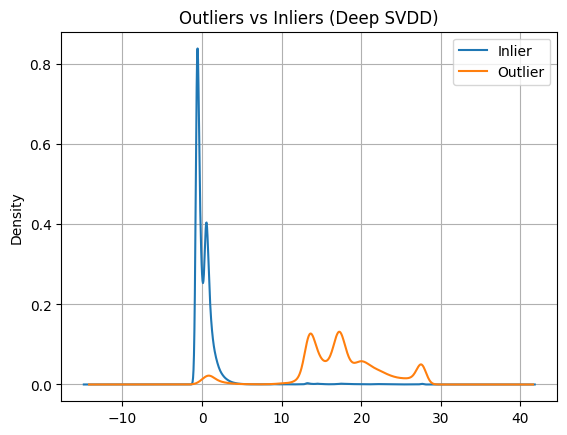

In [6]:
scores_in = scores[np.where(labels==0)[0]]
scores_out = scores[np.where(labels==1)[0]]


in_ = pd.DataFrame(scores_in, columns=['Inlier'])
out_ = pd.DataFrame(scores_out, columns=['Outlier'])


# Show the plot
plt.show()
fig, ax = plt.subplots()
in_.plot.kde(ax=ax, legend=True, title='Outliers vs Inliers (Deep SVDD)')
out_.plot.kde(ax=ax, legend=True)
ax.grid(axis='x')
ax.grid(axis='y')
plt.savefig('DAGMM_VAE.png', dpi=300, bbox_inches='tight')
plt.show()